In [27]:
import pandas as pd
import ast
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('csv_result_mercury/result_8.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'csv_results_mercury/result_8.csv'

In [ ]:
arma_mse = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['ARMA'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
informer_mse = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['Informer'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
rnn_mse = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['RNN'].apply(ast.literal_eval).to_list()),multioutput='raw_values')


In [ ]:
informer_select = np.array(df['Informer_para'].apply(ast.literal_eval).to_list())[:,0]
informer_select

array([ 10,  20,  10,  50,  10, 100, 100,  50,  10,  10,  10, 100, 100,
        20,  20, 100, 100,  20,  10,  50, 100,  10,  20,  20,  20,  50,
        20,  20,  20, 100, 100,  20,  50,  50, 100, 100,  50, 100,  10,
        10,  20, 100,  20,  50, 100,  20,  10, 100, 100,  10,  50,  10,
        50,  50,  50,  20,  50,  50,  20,  10,  50, 100,  10,  50,  50,
        10,  20,  50, 100, 100, 100,  20,  10,  10,  10, 100,  20, 100,
        50,  50,  10, 100,  20, 100,  50,  20,  10,  10,  10,  10,  20,
        10,  10,  10, 100,  20,  50,  10,  50,  10])

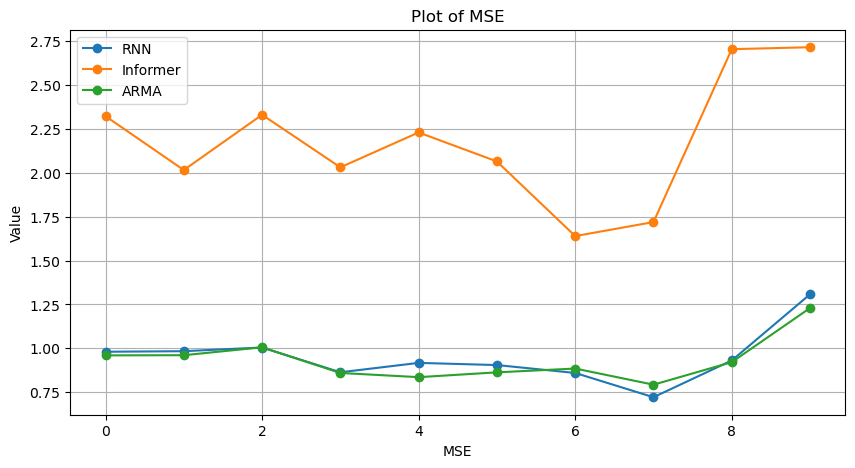

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the array
plt.figure(figsize=(10, 5))
plt.plot(rnn_mse,label = 'RNN', marker='o')  # Using 'o' as a marker for each data point
plt.plot(informer_mse,label = 'Informer', marker='o')  # Using 'o' as a marker for each data point
plt.plot(arma_mse,label = 'ARMA', marker='o')  # Using 'o' as a marker for each data point
plt.title('Plot of MSE')
plt.xlabel('MSE')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


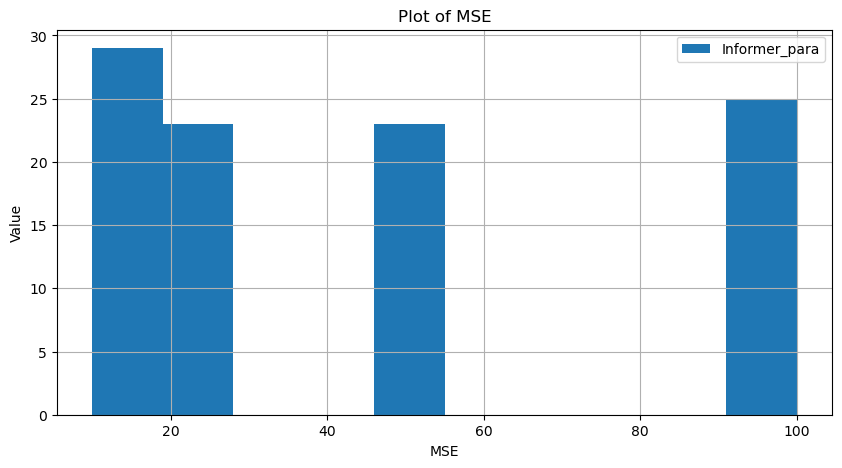

In [ ]:

# Plotting the array
plt.figure(figsize=(10, 5))
plt.hist(informer_select,label = 'Informer_para')  # Using 'o' as a marker for each data point
plt.title('Plot of MSE')
plt.xlabel('MSE')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()